## Predicting Index Levels for a Real Financial Instrument

*[Coding along with Python for Algorithmic Trading, Yves Hilpisch, O'Reilly, 1st edition November 2020, ISBN-13: 978-1492053354; Quant Platform at [https://py4at.pqp.io](https://py4at.pqp.io); GitHub repo at [yhilpisch/py4at](https://github.com/yhilpisch/py4at)]*

In [13]:
import pandas as pd
import numpy as np

In [4]:
# for starters, let's read the data
raw = pd.read_csv("../../assets/data/pyalgo_eikon_eod_data.csv", index_col=0, parse_dates=True).dropna() # (2)

In [5]:
raw

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.1000,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,284.270000,157.380,59.41,1789.21,229.91,321.23,3223.38,12.67,1.1087,1498.8100,28.66,141.27
2019-12-26,289.910000,158.670,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.800000,158.960,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33


In [6]:
raw.info() # retrieves end-of-day (EOD) data 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [7]:
symbol = 'EUR='
symbol

'EUR='

In [8]:
# storing retrieves end-of-day (EOD) data in dataFrame object
# time series data for the specific symbol is selected from the original dataFrame
data = pd.DataFrame(raw[symbol]) # transforming Series object to DataFrame object
data

,EUR=
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412
...,...
2019-12-24,1.1087
2019-12-26,1.1096
2019-12-27,1.1175


In [9]:
data.rename(columns={symbol: 'price'}, inplace=True) # renaming single column to price
data

,price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412
...,...
2019-12-24,1.1087
2019-12-26,1.1096
2019-12-27,1.1175


#### __Implementing the Regression-Based Prediction Approach__

This is very much going to be like the code from the previous notebook (the one with basics of linear regression).

In [10]:
lags = 5 # defines the number of lags
lags 

5

In [11]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag) # takes the price column and shifts it by lag
    cols.append(col)
data.dropna(inplace=True)
data

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318
2010-01-15,1.4382,1.4502,1.4510,1.4494,1.4513,1.4412
...,...,...,...,...,...,...
2019-12-24,1.1087,1.1086,1.1078,1.1120,1.1111,1.1149
2019-12-26,1.1096,1.1087,1.1086,1.1078,1.1120,1.1111
2019-12-27,1.1175,1.1096,1.1087,1.1086,1.1078,1.1120


In [14]:
reg = np.linalg.lstsq(data[cols], data['price'], rcond=None)[0]

In [16]:
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

#### __Plotting the EUR/USD Exchange Rate and the Predicted Values__

In [17]:
# calculating the prediction value as the dot product
data['prediction'] = np.dot(data[cols], reg) # the dot product yielding the prediction results

In [18]:
data

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction
Date,,,,,,,
2010-01-11,1.4513,1.4412,1.4318,1.4412,1.4368,1.4411,1.440583
2010-01-12,1.4494,1.4513,1.4412,1.4318,1.4412,1.4368,1.451482
2010-01-13,1.4510,1.4494,1.4513,1.4412,1.4318,1.4412,1.448865
2010-01-14,1.4502,1.4510,1.4494,1.4513,1.4412,1.4318,1.450505
2010-01-15,1.4382,1.4502,1.4510,1.4494,1.4513,1.4412,1.450238
...,...,...,...,...,...,...,...
2019-12-24,1.1087,1.1086,1.1078,1.1120,1.1111,1.1149,1.108330
2019-12-26,1.1096,1.1087,1.1086,1.1078,1.1120,1.1111,1.108738
2019-12-27,1.1175,1.1096,1.1087,1.1086,1.1078,1.1120,1.109368


<Axes: xlabel='Date'>

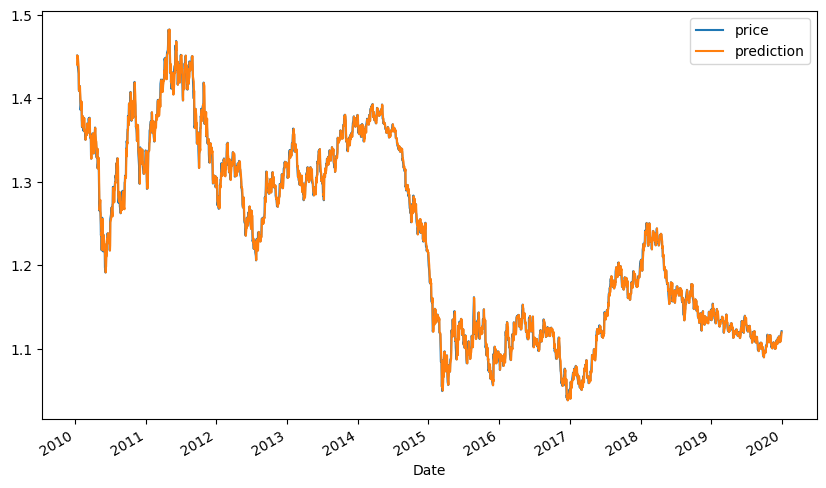

In [20]:
data[['price', 'prediction']].plot(figsize=(10,6)) # plots price and prediction columns

#### __Zooming in and Plotting the Results for a Shorter Time Window__

Zooming in and plotting the results for a much shorter time window will allow us to better distinguish the two time series.

<Axes: >

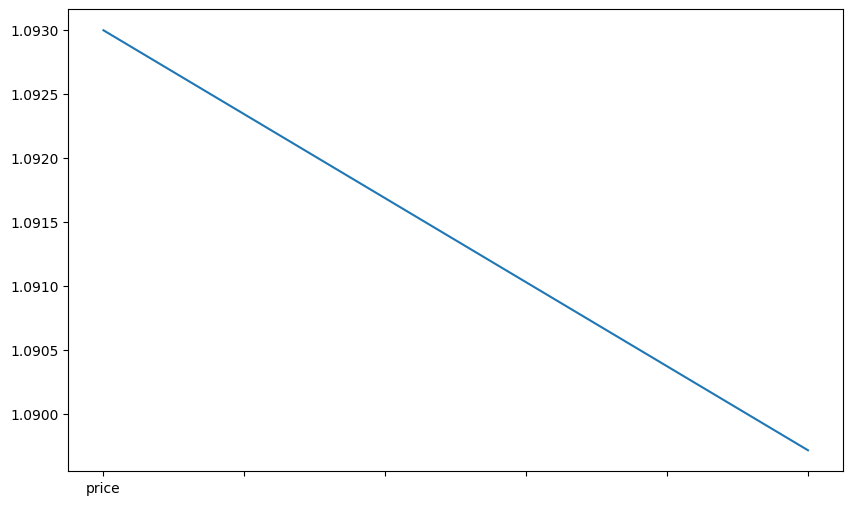

In [22]:
data[['price', 'prediction']].loc['2019-10-1'].plot(figsize=(10,6)) # plots price and prediction columns